### Time Series Trial

In [37]:
import pandas as pd 
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import pprint
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [49]:
data_cols=['Güneş']

In [149]:
path = r"D:\GES"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    fl = pd.read_csv(filename, index_col=None, header=0,skipfooter=1,engine='python')
    fl=fl[['Tarih','Saat','Güneş']]
    fl['GES']=str(filename.split('-')[1])
    li.append(fl)
    
    

#data['Tarih'] = pd.to_datetime(data['Tarih'])
#data.dtypes


In [150]:
for i in range(18):
   # li[i]['Güneş']=li[i]['Güneş'].apply(lambda x: x.replace(',','.'))#.apply(lambda x: float(x))
    li[i]['Güneş']=li[i]['Güneş'].apply(lambda x: x.replace(',','.'))
    li[i]['Güneş']=li[i]['Güneş'].apply(lambda x: float(x))

In [151]:
maksili=[]
for i in range(18):
    maks=float(li[i]['Güneş'].max())
    maksili.append(maks)
    li[i]['Güneş']=li[i]['Güneş'].apply(lambda x: x/maksili[i])
    

data = pd.concat(li, axis=0, ignore_index=True)

In [152]:
data['Tarihsaat']=pd.to_datetime(data['Tarih']+' '+data['Saat'])
data=data.set_index('Tarihsaat')
data


,Tarih,Saat,Güneş,GES
Tarihsaat,,,,
2019-09-26 00:00:00,26.09.2019,00:00,0.000000,AFTA
2019-09-26 01:00:00,26.09.2019,01:00,0.000000,AFTA
2019-09-26 02:00:00,26.09.2019,02:00,0.000000,AFTA
2019-09-26 03:00:00,26.09.2019,03:00,0.000000,AFTA
2019-09-26 04:00:00,26.09.2019,04:00,0.000000,AFTA
...,...,...,...,...
2020-07-31 18:00:00,31.07.2020,18:00,0.104463,YAYSUN
2020-07-31 19:00:00,31.07.2020,19:00,0.008547,YAYSUN
2020-07-31 20:00:00,31.07.2020,20:00,0.000000,YAYSUN


### Resample 

In [9]:
def ciz(datan,name1,name2):
    fig, ax = plt.subplots(figsize = (11,4))
    #ax.plot(data['Güneş'], marker='.', markersize=2, color='0.8',linestyle='None', label='')
    
    ax.plot(datan['Güneş'], linewidth=2, label=str(name2))
    #datan['Güneş'].plot()
    ax.legend()
    ax.set_xlabel(name1)
    ax.set_ylabel('Üretim')
    ax.set_title('GES Enerji Üretim Grafiği'+name2)

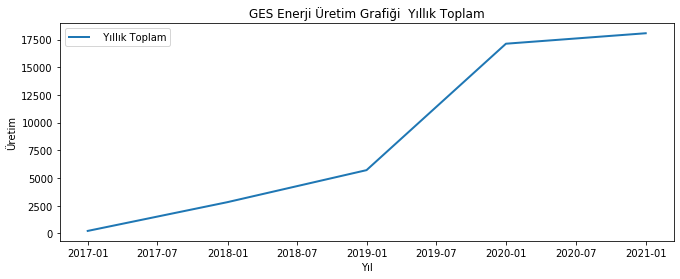

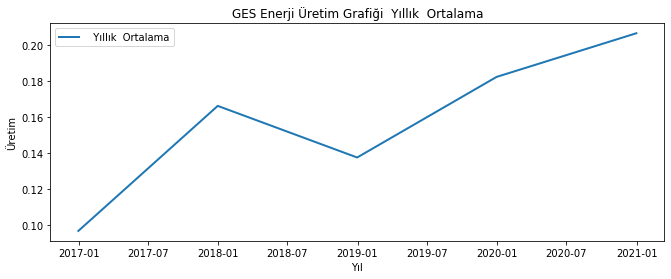

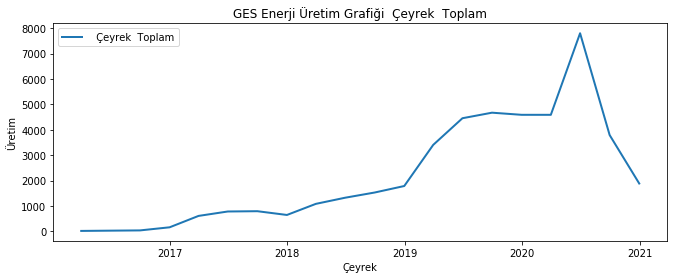

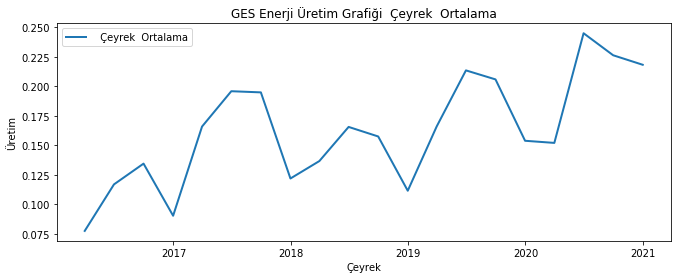

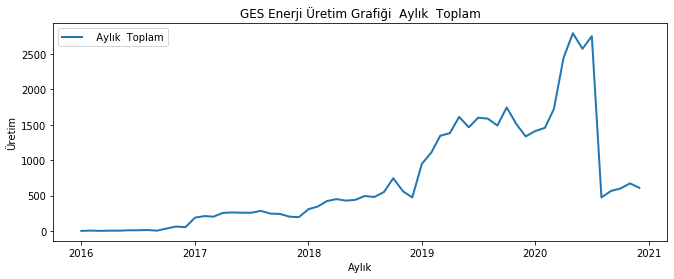

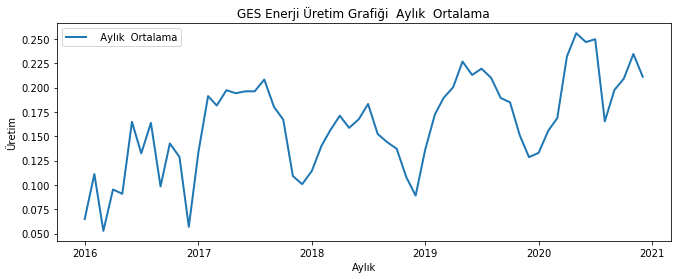

In [13]:
data_col=['Güneş']
data_yearly_mean = data[data_col].resample('A').sum() 
ciz(data_yearly_mean,'Yıl',"  Yıllık Toplam")
data_yearly_sum=data[data_col].resample('A').mean()
ciz(data_yearly_sum,'Yıl',"  Yıllık  Ortalama")

data_quarterly_sum = data[data_col].resample('Q').sum() 
ciz(data_quarterly_sum,'Çeyrek',"  Çeyrek  Toplam")


data_quarterly_mean = data[data_col].resample('Q').mean() 
ciz(data_quarterly_mean,'Çeyrek',"  Çeyrek  Ortalama")

data_monthly_sum = data[data_col].resample('MS').sum()
ciz(data_monthly_sum,'Aylık',"  Aylık  Toplam")

data_monthly_mean = data[data_col].resample('MS').mean()
ciz(data_monthly_mean,'Aylık',"  Aylık  Ortalama")


### Rolling Window

### Haftalık

<Figure size 2400x1600 with 0 Axes>

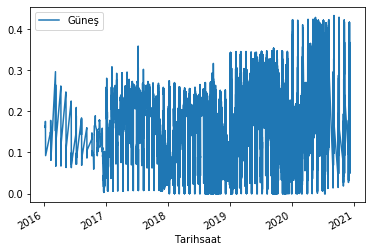

In [35]:
plt.figure(figsize=(30,20), dpi= 80)

wind=data.rolling(24*7).mean()
wind.plot()

### Aylık

<Figure size 2400x1600 with 0 Axes>

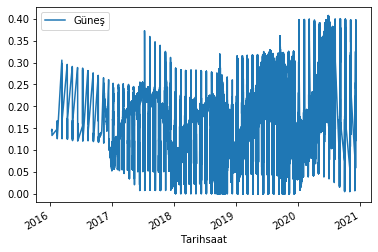

In [26]:
plt.figure(figsize=(30,20), dpi= 80)

wind=data.rolling(24*30).mean()
wind.plot()

### Yıllık

<Figure size 2400x1600 with 0 Axes>

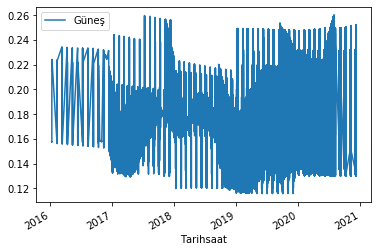

In [33]:
plt.figure(figsize=(30,20), dpi= 80)

wind=data.rolling(24*365).mean()
wind.plot()

### Detrending

In [66]:
datdif=data[data_cols].diff()
datdif=pd.DataFrame(datdif)
datdif

,Güneş
Tarihsaat,
2019-09-26 00:00:00,NaN
2019-09-26 01:00:00,0.000000
2019-09-26 02:00:00,0.000000
2019-09-26 03:00:00,0.000000
2019-09-26 04:00:00,0.000000
...,...
2020-07-31 18:00:00,-0.208927
2020-07-31 19:00:00,-0.095916
2020-07-31 20:00:00,-0.008547


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


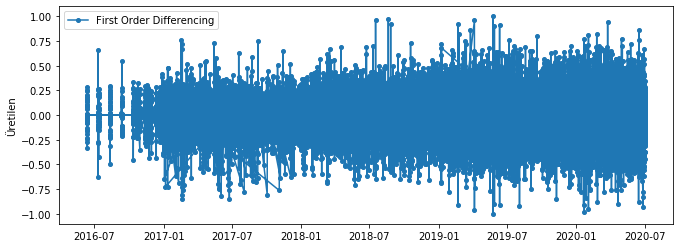

In [61]:
start,end='2016-06','2020-06'
fig, ax = plt.subplots(figsize=(11, 4))
ax.plot(datdif.loc[start:end, 'Güneş'],
marker='o', markersize=4, linestyle='-', label='First Order Differencing')
ax.set_ylabel('Üretilen')
ax.legend();

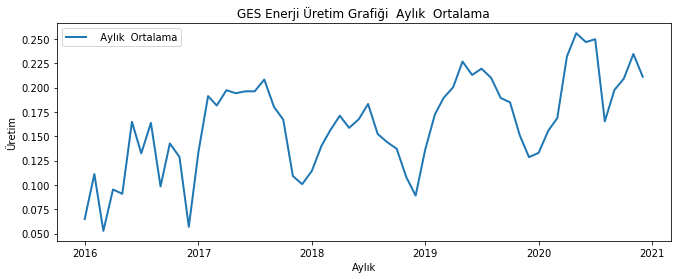

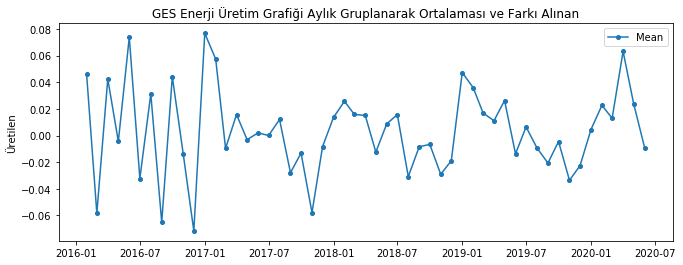

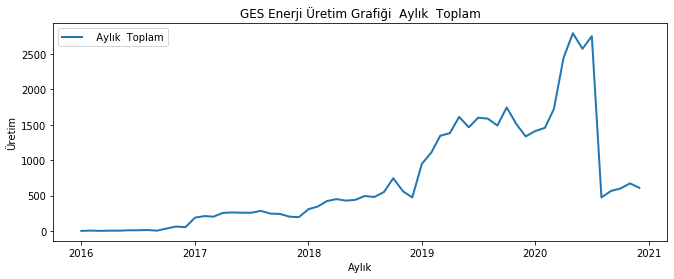

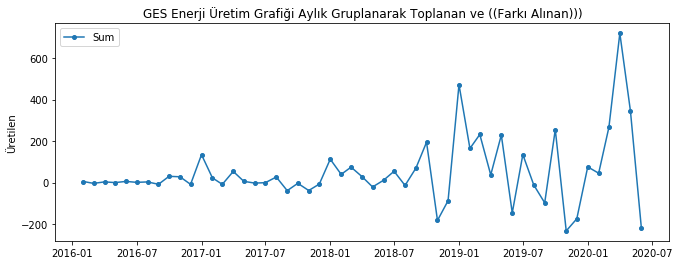

In [155]:
data_monthly_mean = data[data_col].resample('MS').mean()
ciz(data_monthly_mean,'Aylık',"  Aylık  Ortalama")


#####################################Diff ile detrend
data_aylık = data[data_col].resample('MS').mean()
datdif=data_aylık[data_cols].diff()
datdif=pd.DataFrame(datdif)


start,end='2016-01','2020-06'
fig, ax = plt.subplots(figsize=(11, 4))
ax.plot(datdif.loc[start:end, 'Güneş'],
marker='o', markersize=4, linestyle='-', label='Mean')
ax.set_title('GES Enerji Üretim Grafiği Aylık Gruplanarak Ortalaması ve Farkı Alınan')
ax.set_ylabel('Üretilen')
ax.legend()



######################3#############Sum
data_monthly_sum = data[data_col].resample('MS').sum()
ciz(data_monthly_sum,'Aylık',"  Aylık  Toplam")


############################



datas = data[data_col].resample('MS').sum()
datdifs=datas[data_cols].diff()
datdifs=pd.DataFrame(datdifs)

start,end='2016-01','2020-06'
fig, ax = plt.subplots(figsize=(11, 4))
ax.plot(datdifs.loc[start:end, 'Güneş'],
marker='o', markersize=4, linestyle='-', label='Sum')
ax.set_title('GES Enerji Üretim Grafiği Aylık Gruplanarak Toplanan ve ((Farkı Alınan)))')
ax.set_ylabel('Üretilen')
ax.legend()









### Seasonality

In [107]:
#datamon = data[data_col].resample('MS').mean()
#datamon.loc['2016-01': '2020-06','Güneş'].plot(marker = 'o', figsize=(11, 9))

### Autocorrelation 

### Aylık Verinin Ortalamasının Autocorelation Grafiği

<Figure size 2400x1600 with 0 Axes>

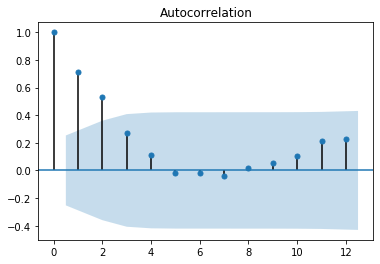

In [127]:
plt.figure(figsize=(30,20), dpi= 80)
plot_acf(data_aylık['Güneş'],lags=12)
plt.show()

<Figure size 2400x1600 with 0 Axes>

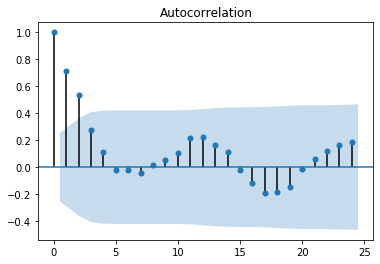

In [123]:
plt.figure(figsize=(30,20), dpi= 80)
plot_acf(data_aylık['Güneş'],lags=24)
plt.show()

Çok yüksek bir değer gözlemleyememiş olsak bile periodun 12 ay olduğunu bu grafikte görebiliyoruz.


<Figure size 2400x1600 with 0 Axes>

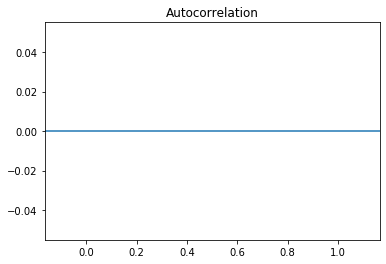

In [145]:
datdif['Güneş']=datdif['Güneş']*100
plt.figure(figsize=(30,20), dpi= 80)
plot_acf(datdif['Güneş'],lags=24)
plt.show()

Trendi çıkartılmış veriyi değerlendirdiğimizde autocorrelation gözlemleyemiyoruz.(?)

### Aylık Toplam Verinin Autocorelation Grafiği

<Figure size 2400x1600 with 0 Axes>

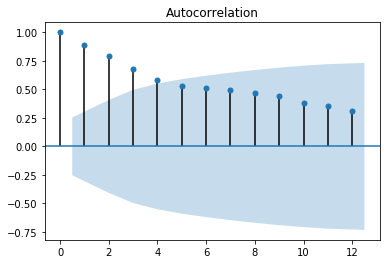

In [128]:
plt.figure(figsize=(30,20), dpi= 80)
plot_acf(datas['Güneş'],lags=12)
plt.show()

<Figure size 2400x1600 with 0 Axes>

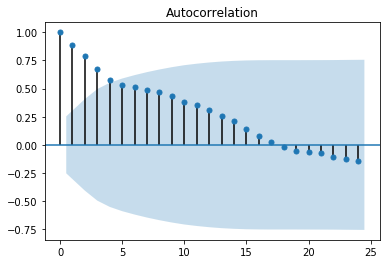

In [129]:
plt.figure(figsize=(30,20), dpi= 80)
plot_acf(datas['Güneş'],lags=24)
plt.show()

### Farklı bir Autocorrelation Hesaplama Fonksiyonu

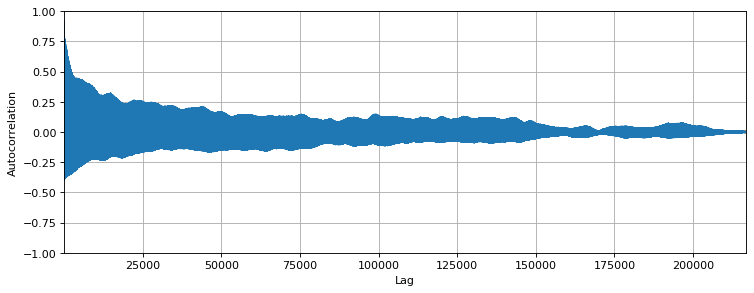

In [159]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(data.loc['2016-01': '2020-06', 'Güneş']);

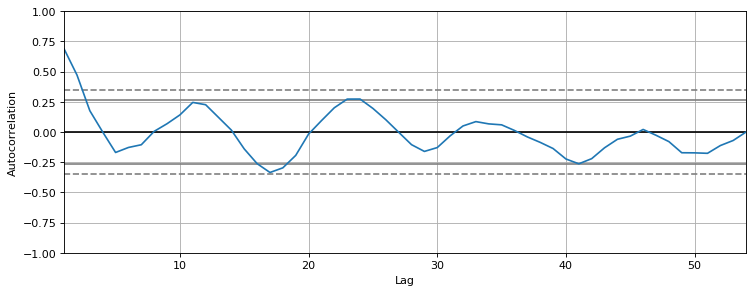

In [160]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(data_aylık.loc['2016-01': '2020-06', 'Güneş']);

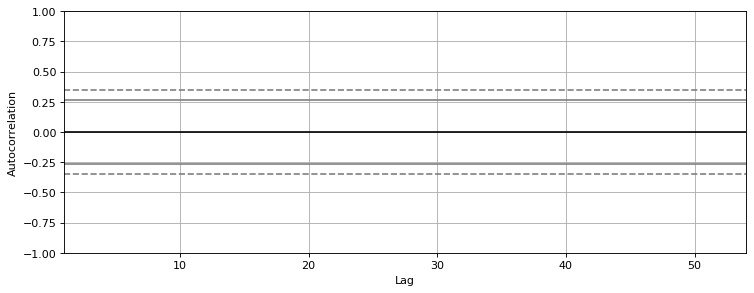

In [166]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(datdif.loc['2016-01': '2020-06', 'Güneş'])

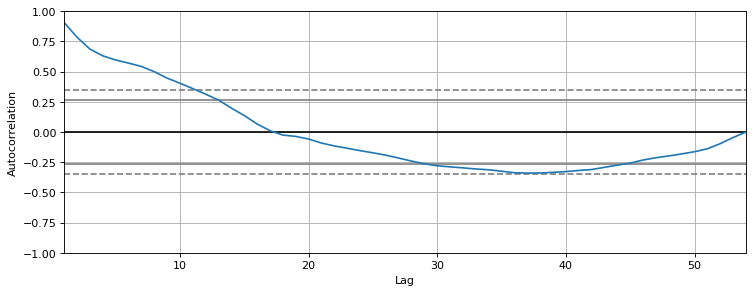

In [162]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(datas.loc['2016-01': '2020-06', 'Güneş']);#summation

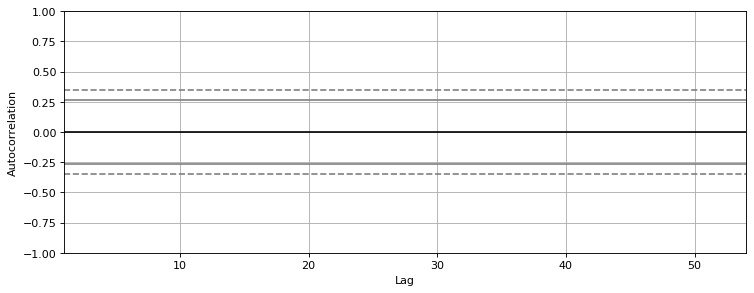

In [165]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(datdifs.loc['2016-01': '2020-06', 'Güneş'])

## Autoregression

In [205]:
from statsmodels.tsa.ar_model import AutoReg
datar=np.asarray(data_aylık['Güneş'])

split = len(datar) - int(0.2*len(datar))
train, test = datar[0:split], datar[split:len(datar)]
len(train)
len(test)

12

In [206]:
modelar = AutoReg(train, lags=12)#Trendi olup olmadığını da parametre olarak gösterebiliyoruz 'c'(constant trend) veya 't'(time trend)
model_fitar = modelar.fit()
print(model_fitar.summary())



                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   48
Model:                    AutoReg(12)   Log Likelihood                  95.528
Method:               Conditional MLE   S.D. of innovations              0.017
Date:                Tue, 11 Aug 2020   AIC                             -7.367
Time:                        11:32:43   BIC                             -6.751
Sample:                            12   HQIC                            -7.152
                                   48                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1435      0.030      4.817      0.000       0.085       0.202
y.L1           0.7890      0.142      5.548      0.000       0.510       1.068
y.L2          -0.2451      0.190     -1.287      0.1

[0.11078364 0.17748154 0.18501876 0.200278   0.21037203 0.17792301
 0.19824788 0.18644275 0.19720952 0.15920005 0.13697862 0.09969838
 0.11411466 0.12578987 0.15372382 0.16915709 0.17398699 0.16721571
 0.18334457 0.19348417 0.16594075 0.15642529 0.13839082 0.12271544
 0.12017751 0.15835479 0.18383617 0.19792795 0.20035299 0.21408946
 0.19752266 0.20597923 0.18433974 0.15844477 0.15109458 0.12219626
 0.11946151]


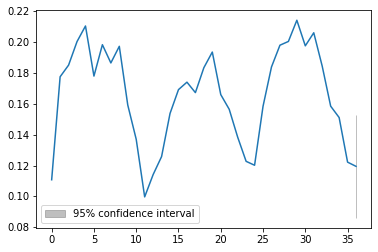

In [207]:
yhat=model_fitar.predict(len(test),len(train))#datar[len(train):len(test)])
print(yhat)

fig=model_fitar.plot_predict(len(test),len(train))




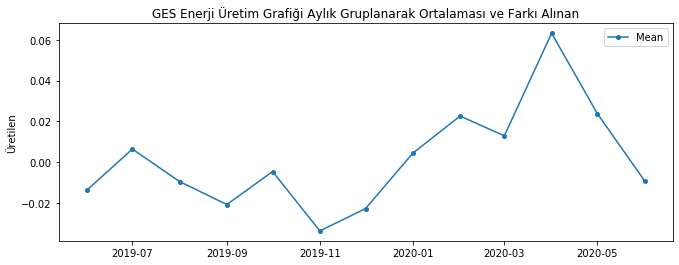

In [189]:
data_aylık = data[data_col].resample('MS').mean()
datdif=data_aylık[data_cols].diff()
datdif=pd.DataFrame(datdif)


start,end='2019-06','2020-06'
fig, ax = plt.subplots(figsize=(11, 4))
ax.plot(datdif.loc[start:end, 'Güneş'],
marker='o', markersize=4, linestyle='-', label='Mean')
ax.set_title('GES Enerji Üretim Grafiği Aylık Gruplanarak Ortalaması ve Farkı Alınan')
ax.set_ylabel('Üretilen')
ax.legend()

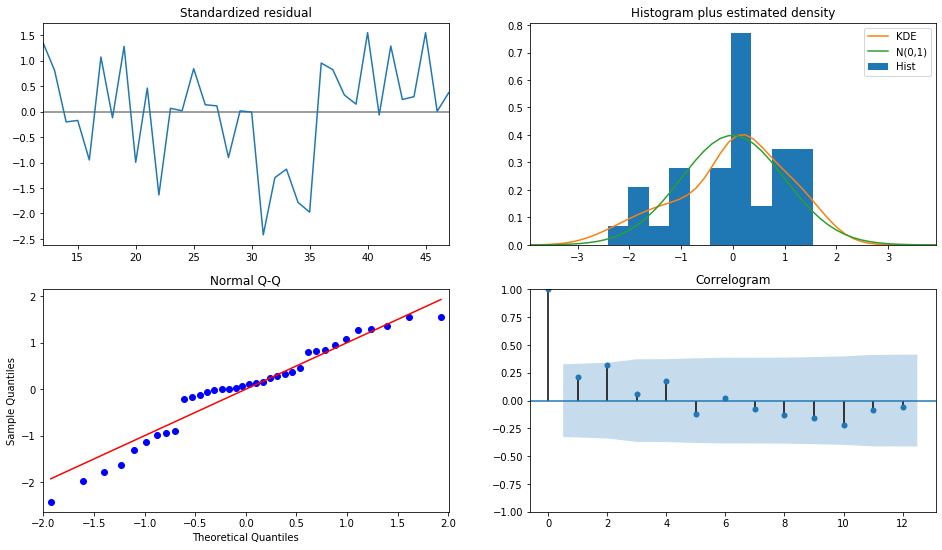

In [195]:
fig = plt.figure(figsize=(16,9))
fig = model_fitar.plot_diagnostics(fig=fig, lags=12)

## Moving Average

In [198]:
from statsmodels.tsa.arima_model import ARMA
datar=np.asarray(data_aylık['Güneş'])

split = len(datar) - int(0.2*len(datar))
train, test = datar[0:split], datar[split:len(datar)]
len(train)
len(test)

12

In [211]:
modelma = ARMA(datar, order=(0, 3))#(0,1) iken daha kötüydü
model_fitma = modelma.fit()
print(model_fitma.summary())



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   60
Model:                     ARMA(0, 3)   Log Likelihood                 120.745
Method:                       css-mle   S.D. of innovations              0.032
Date:                Tue, 11 Aug 2020   AIC                           -231.489
Time:                        11:35:05   BIC                           -221.017
Sample:                             0   HQIC                          -227.393
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1614      0.010     15.686      0.000       0.141       0.182
ma.L1.y        0.6836      0.131      5.213      0.000       0.427       0.941
ma.L2.y        0.5897      0.118      5.012      0.0

[0.09374192 0.13020395 0.20410241 0.19185258 0.16685458 0.17768617
 0.19144041 0.18221502 0.18647295 0.1736035  0.15962598 0.1214206
 0.1158406  0.1357115  0.15840539 0.16193294 0.16724725 0.16023863
 0.16343816 0.17695101 0.15789793 0.14206545 0.14361871 0.13067067
 0.11073912 0.14558588 0.18450691 0.18677163 0.18013711 0.20243165
 0.19937697 0.19275764 0.18756055 0.17766532 0.1715098  0.15207981
 0.13500668]


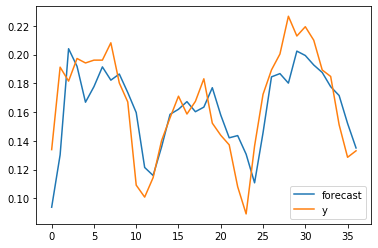

In [212]:
yhat=model_fitma.predict(len(test),len(train))#datar[len(train):len(test)])
print(yhat)

fig=model_fitma.plot_predict(len(test),len(train))


## ARIMA

In [215]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(datar, order=(1, 1, 1))
model_fit_arima = model.fit()

print(model_fit_arima.summary())


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   59
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 116.717
Method:                       css-mle   S.D. of innovations              0.033
Date:                Tue, 11 Aug 2020   AIC                           -225.434
Time:                        11:39:44   BIC                           -217.124
Sample:                             1   HQIC                          -222.190
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025      0.004      0.569      0.570      -0.006       0.011
ar.L1.D.y     -0.9998      0.019    -51.779      0.000      -1.038      -0.962
ma.L1.D.y      1.0000        nan        nan        n

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


[0.05952065 0.13631433 0.19376543 0.18399734 0.19980018 0.19663539
 0.19864994 0.19859963 0.21072634 0.18269286 0.16955363 0.11155061
 0.10329582 0.11681332 0.14262607 0.15841941 0.17356372 0.16105814
 0.16994498 0.18559684 0.15479221 0.14627547 0.13966958 0.11048066
 0.09160139 0.13883032 0.17485248 0.19177914 0.20292129 0.22915062
 0.21545248 0.22186194 0.21250708 0.19174512 0.18729273 0.15360887
 0.13101905]


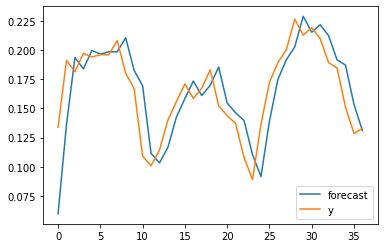

In [216]:
yhat = model_fit_arima.predict(len(test), len(train), typ='levels')
print(yhat)

fig=model_fit_arima.plot_predict(len(test),len(train))